In [1]:
import pandas as pd

# Import csv => pandas to create dataframe

In [2]:
# import anomalous traffic - brute force simulation

In [3]:
badtraffic = pd.read_csv("UbuntuBruteForceValeria.pcap_Flow.csv")
badtraffic2 = pd.read_csv("Centosx3BruteFroce.pcap_Flow.csv")

In [4]:
bt = pd.DataFrame(badtraffic)
bt2 = pd.DataFrame(badtraffic2)

## Data Frame Size

In [5]:
bt.shape

(8895, 84)

In [6]:
bt2.shape

(26771, 84)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
bt = bt[['Src Port','Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

bt2 = bt2[['Src Port','Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

In [9]:
#add a new column 'Label' = 1 to label anomalous traffic (brute force login attempts)

In [10]:
bt['Label'] = 'ssh-bruteforce'
bt2['Label'] = 'ssh-bruteforce'

In [11]:
anomaloustraffic = [bt, bt2]

bad = pd.concat(anomaloustraffic)

In [12]:
# Import csv of IDS (good traffic) - pandas to create dataframe

In [13]:
goodtraffic = pd.read_csv(r"C:\Users\Tandoi\Desktop\Progetto Master\Test PCAP\PCAPs_Suricata\csvids\all_ids.csv")

In [14]:
goodtraffic2 = pd.read_csv(r"C:\Users\Tandoi\Desktop\Progetto Master\Test PCAP\PCAPs_Suricata_Weekend\idswe\all_ids_we.csv")

In [15]:
gt = pd.DataFrame(goodtraffic)
gt2 = pd.DataFrame(goodtraffic2)

In [16]:
gt.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.25.75.126-172.16.68.58-60598-22-6,172.25.75.126,60598,172.16.68.58,22,6,20/02/2020 06:37:51 AM,12209565,130,70,2856.0,6448.0,188.0,0.0,21.969231,29.373811,1368.0,36.0,92.114286,222.925967,762.025510,16.380600,6.135460e+04,5.092299e+05,7020029.0,1.0,12209565.0,9.464779e+04,6.308373e+05,7020029.0,3.0,12205863.0,1.768966e+05,8.581300e+05,7027831.0,1.0,1,0,0,0,4160,2240,10.647390,5.733210,0.0,1368.0,46.467662,137.191691,18821.560199,0,0,0,130,200,0,0,0,0.0,46.700000,21.969231,92.114286,0,0,0,0,44,2334,0,14,0,32,2048,356,61,32,0,0,0,0,1.582199e+15,3.688658e+06,1.582199e+15,1.582199e+15,NeedManualLabel
1,172.25.75.126-172.16.68.56-60603-22-6,172.25.75.126,60603,172.16.68.56,22,6,20/02/2020 06:36:44 AM,34823465,54,36,824.0,5104.0,44.0,0.0,15.259259,18.682234,1368.0,0.0,141.777778,305.653315,170.230045,2.584464,3.912749e+05,3.112204e+06,29276513.0,3.0,34823465.0,6.570465e+05,4.026588e+06,29276513.0,3.0,34816392.0,9.947541e+05,4.945468e+06,29279587.0,4.0,1,0,0,0,1728,1176,1.550679,1.033786,0.0,1368.0,65.538462,200.969003,40388.540171,0,0,0,54,90,0,0,0,0.0,66.266667,15.259259,141.777778,0,0,0,0,18,2045,0,9,0,56,2048,399,21,32,0,0,0,0,1.582199e+15,9.766441e+06,1.582199e+15,1.582199e+15,NeedManualLabel
2,172.25.75.126-172.16.68.58-60536-22-6,172.25.75.126,60536,172.16.68.58,22,6,20/02/2020 06:37:55 AM,8987891,10,6,448.0,696.0,188.0,0.0,44.800000,76.890687,188.0,36.0,116.000000,68.258333,127.282362,1.780173,5.991927e+05,2.310391e+06,8950729.0,4.0,8987891.0,9.986546e+05,2.982040e+06,8950729.0,5.0,8979662.0,1.795932e+06,4.001291e+06,8953631.0,4.0,1,0,0,0,320,192,1.112608,0.667565,0.0,188.0,78.352941,82.268570,6768.117647,0,0,0,10,16,0,0,0,0.0,83.250000,44.800000,116.000000,0,0,0,0,5,33885,0,28,0,43,2048,355,3,32,0,0,0,0,1.582199e+15,4.456939e+06,1.582199e+15,1.582199e+15,NeedManualLabel
3,172.25.75.126-172.16.68.56-60534-22-6,172.25.75.126,60534,172.16.68.56,22,6,20/02/2020 06:36:46 AM,59600,6,4,72.0,320.0,36.0,0.0,12.000000,18.590320,124.0,36.0,80.000000,50.806824,6577.181208,167.785235,6.622222e+03,1.782849e+04,54114.0,3.0,59600.0,1.192000e+04,2.469581e+04,56016.0,3.0,56150.0,1.871667e+04,3.228493e+04,55996.0,7.0,1,0,0,0,192,128,100.671141,67.114094,0.0,124.0,38.909091,45.363983,2057.890909,0,0,0,6,10,0,0,0,0.0,42.800000,12.000000,80.000000,0,0,0,0,6,6777,0,7,0,32,2048,355,1,32,0,0,0,0,1.582199e+15,2.910616e+04,1.582199e+15,1.582199e+15,NeedManualLabel
4,172.25.75.126-172.16.68.57-60535-22-6,172.25.75.126,60535,172.16.68.57,22,6,20/02/2020 06:36:54 AM,33717520,18,10,896.0,1240.0,188.0,0.0,49.777778,77.444140,188.0,36.0,124.000000,62.425066,63.349855,0.830429,1.248797e+06,4.311826e+06,16552241.0,3.0,33717520.0,1.983384e+06,5.353853e+06,16552241.0,3.

In [18]:
gt2.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.25.75.126-172.16.68.51-52766-22-6,172.25.75.126,52766,172.16.68.51,22,6,20/02/2020 12:05:25 PM,49950565,80,41,1440.0,3400.0,60.0,0.0,18.000000,19.314846,764.0,36.0,82.926829,150.303757,96.895801,2.422395,416254.708333,3.153364e+06,34304189.0,2.0,49950565.0,632285.632911,3.877136e+06,34304189.0,2.0,49946827.0,1.248671e+06,5.412328e+06,34312901.0,122.0,1,0,0,0,2560,1312,1.601583,0.820812,0.0,764.0,40.032787,93.039042,8656.263379,1,0,0,79,121,0,0,0,0.0,40.363636,18.000000,82.926829,0,0,0,0,13,715,0,11,0,28,2048,334,37,32,0,0,0,0,1.582218e+15,1.040415e+07,1.582218e+15,1.582218e+15,NeedManualLabel
1,172.16.68.51-172.25.75.126-22-52766-6,172.16.68.51,22,172.25.75.126,52766,6,20/02/2020 12:06:14 PM,6882,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,290.613194,6882.000000,0.000000e+00,6882.0,6882.0,6882.0,6882.000000,0.000000e+00,6882.0,6882.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,64,0,290.613194,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,334,0,0,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
2,172.25.75.126-172.16.68.51-52874-22-6,172.25.75.126,52874,172.16.68.51,22,6,20/02/2020 12:07:23 PM,16499772,110,61,4385.0,5453.0,1368.0,0.0,39.863636,147.686469,948.0,0.0,89.393443,177.778259,596.250663,10.363780,97057.482353,3.780729e+05,4319866.0,2.0,16499772.0,151374.055046,4.641736e+05,4319866.0,2.0,16497433.0,2.749572e+05,6.011095e+05,4321714.0,127.0,0,0,0,0,3532,1960,6.666759,3.697021,0.0,1368.0,57.197674,159.921239,25574.802802,1,2,0,106,170,0,0,0,0.0,57.532164,39.863636,89.393443,0,0,0,0,35,1023,0,25,0,31,65535,313,53,32,0,0,0,0,1.582218e+15,4.362122e+06,1.582218e+15,1.582218e+15,NeedManualLabel
3,172.16.68.51-172.25.75.126-22-52874-6,172.16.68.51,22,172.25.75.126,52874,6,20/02/2020 12:07:40 PM,7586,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,263.643554,7586.000000,0.000000e+00,7586.0,7586.0,7586.0,7586.000000,0.000000e+00,7586.0,7586.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,64,0,263.643554,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,313,0,0,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
4,172.25.75.126-172.16.68.51-55377-22-6,172.25.75.126,55377,172.16.68.51,22,6,21/02/2020 01:56:48 AM,28638470,89,52,3925.0,5069.0,1368.0,0.0,44.101124,163.687621,948.0,0.0,97.480769,188.046249,314.053090,4.923447,204560.500000,1.261414e+06,14645669.0,4.0,28638470.0,325437.159091,1.581966e+06,14645669.0,5.0,28536597.0,5.595411e+05,2.055770e+06,14648555.0,130.0,0,0,0,0,2872,1672,3.107708,1.815739,0.

In [17]:
good = gt[['Src Port', 'Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

good2 = gt2[['Src Port', 'Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

In [19]:
good['Label'] = 'not-ssh-bruteforce'
good2['Label'] = 'not-ssh-bruteforce'

C:\Users\Tandoi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tandoi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
good.head()

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Label
0,60598,22,12209565,130,2856.0,0,0,200,130,not-ssh-bruteforce
1,60603,22,34823465,54,824.0,0,0,90,54,not-ssh-bruteforce
2,60536,22,8987891,10,448.0,0,0,16,10,not-ssh-bruteforce
3,60534,22,59600,6,72.0,0,0,10,6,not-ssh-bruteforce
4,60535,22,33717520,18,896.0,0,0,28,18,not-ssh-bruteforce


In [21]:
good2.head()

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Label
0,52766,22,49950565,80,1440.0,1,0,121,79,not-ssh-bruteforce
1,22,52766,6882,2,0.0,1,0,2,0,not-ssh-bruteforce
2,52874,22,16499772,110,4385.0,1,2,170,106,not-ssh-bruteforce
3,22,52874,7586,2,0.0,1,0,2,0,not-ssh-bruteforce
4,55377,22,28638470,89,3925.0,0,2,140,86,not-ssh-bruteforce


In [22]:
good.shape

(2139, 10)

In [23]:
good2.shape

(11224, 10)

In [24]:
normaltraffic = [good, good2]

normal = pd.concat(normaltraffic)

In [25]:
frames = [bad, normal]

result = pd.concat(frames)

In [26]:
result

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Label
0,38878,22,150206,14,1202.0,1,2,24,12,ssh-bruteforce
1,38958,22,27704,3,22.0,1,2,4,1,ssh-bruteforce
2,38962,22,20619,3,22.0,1,2,4,1,ssh-bruteforce
3,38990,22,6692,3,22.0,1,2,4,1,ssh-bruteforce
4,38872,22,12114834,18,1654.0,1,2,38,23,ssh-bruteforce
...,...,...,...,...,...,...,...,...,...,...
11219,57549,22,41838,3,96.0,0,0,4,2,not-ssh-bruteforce
11220,57549,22,2011,3,96.0,0,0,4,2,not-ssh-bruteforce
11221,57549,22,25694,3,96.0,0,0,4,2,not-ssh-bruteforce
11222,57549,22,2811900,10,268.0,1,0,15,9,not-ssh-bruteforce


In [27]:
target_count = result.Label.value_counts()
print('Class 0:', target_count['not-ssh-bruteforce'])
print('Class 1:', target_count['ssh-bruteforce'])
print('Proportion:', round(target_count['not-ssh-bruteforce'] / target_count['ssh-bruteforce'], 2), ': 1')



Class 0: 13363
Class 1: 35666
Proportion: 0.37 : 1


In [28]:
target_count.plot(kind='bar', title='Count (target)')

In [28]:
# import libraries for ML

In [29]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# Creating feature set and labels
dataset = result.values
X = dataset[:,0:9].astype(float)
Y = dataset[:,9]

In [31]:
# Turning labels into encoded variables
# (essentially booleans for this binary classifier)
le = LabelEncoder()

In [32]:
le.fit(Y)
encoded_Y = le.transform(Y)

In [33]:
# Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, encoded_Y, test_size=0.2)

In [34]:
Y_train

array([1, 0, 1, ..., 1, 1, 1])

In [35]:
X_test.shape

(9806, 9)

## RANDOM FOREST IMPLEMENTATION

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [37]:
rf_estimator = RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
prediction = rf_estimator.predict(X_test)

In [40]:
features = ['Src Port', 'Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']

In [41]:
f_imp = rf_estimator.feature_importances_

In [42]:
Importance = pd.DataFrame({'feature': features, 'feature_importance': f_imp})

In [43]:
Importance

,feature,feature_importance
0,Src Port,0.005791
1,Dst Port,0.004171
2,Flow Duration,0.298350
3,Total Fwd Packet,0.005100
4,Total Length of Fwd Packet,0.173972
5,FIN Flag Count,0.263019
6,SYN Flag Count,0.106697
7,ACK Flag Count,0.041089
8,PSH Flag Count,0.101811


In [44]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in prediction:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [45]:
# Manually printing values for validation
print("\n\nRandom Forest")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



Random Forest
Total entries: 9806
Total correct predictions: 9574
Total incorrect predictions: 232
-------------- Breakdown ---------------
True positives: 7159
True negatives: 2415
False positives: 232
False negatives: 0


In [46]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(rf_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, prediction)))

# Printing classification report
print(classification_report(Y_test, prediction, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, prediction))

Cross Validation Results: 97.49% (0.21%)

Prediction accuracy:

97.63%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.91      0.95      2647
    ssh-bruteforce       0.97      1.00      0.98      7159

          accuracy                           0.98      9806
         macro avg       0.98      0.96      0.97      9806
      weighted avg       0.98      0.98      0.98      9806

[[2415  232]
 [   0 7159]]


In [47]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

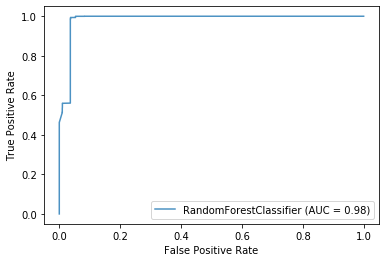

In [48]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_estimator, X_test, Y_test, ax=ax, alpha=0.8)
plt.show()

## K-NEAREST NEIGHBORS IMPLEMENTATION

In [49]:
knn_estimator = make_pipeline(StandardScaler(), PCA(n_components=5), KNeighborsClassifier(n_neighbors=7))
knn_estimator.fit(X_train, Y_train)
predictions = knn_estimator.predict(X_test)

In [50]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [51]:
# Manually printing values for validation
print("\n\nKNN")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



KNN
Total entries: 9806
Total correct predictions: 9762
Total incorrect predictions: 44
-------------- Breakdown ---------------
True positives: 7154
True negatives: 2608
False positives: 39
False negatives: 5


In [52]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(knn_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

Cross Validation Results: 99.60% (0.11%)

Prediction accuracy:

99.55%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.99      0.99      2647
    ssh-bruteforce       0.99      1.00      1.00      7159

          accuracy                           1.00      9806
         macro avg       1.00      0.99      0.99      9806
      weighted avg       1.00      1.00      1.00      9806

[[2608   39]
 [   5 7154]]


## NAIVE BAYES IMPLEMENTATION

In [53]:
gaussian_estimator = make_pipeline(PCA(n_components=5), GaussianNB())
gaussian_estimator.fit(X_train, Y_train)
predictions = gaussian_estimator.predict(X_test)

In [54]:
# Manually collecting statistics for verification
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [55]:
# Manually printing values for validation
print("\n\nNAIVE BAYES")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



NAIVE BAYES
Total entries: 9806
Total correct predictions: 9295
Total incorrect predictions: 511
-------------- Breakdown ---------------
True positives: 7159
True negatives: 2136
False positives: 511
False negatives: 0


In [56]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(gaussian_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

Cross Validation Results: 95.26% (0.23%)

Prediction accuracy:

94.79%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.81      0.89      2647
    ssh-bruteforce       0.93      1.00      0.97      7159

          accuracy                           0.95      9806
         macro avg       0.97      0.90      0.93      9806
      weighted avg       0.95      0.95      0.95      9806



In [57]:
# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

[[2136  511]
 [   0 7159]]


## DECISION TREE IMPLEMENTATION

In [58]:
tree_estimator=tree.DecisionTreeClassifier()
tree_estimator.fit(X_train, Y_train)
predictions = tree_estimator.predict(X_test)

In [59]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [60]:
# Manually printing values for validation
print("\n\nDecision Tree")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



Decision Tree
Total entries: 9806
Total correct predictions: 9790
Total incorrect predictions: 16
-------------- Breakdown ---------------
True positives: 7157
True negatives: 2633
False positives: 14
False negatives: 2


In [61]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(tree_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

Cross Validation Results: 99.88% (0.04%)

Prediction accuracy:

99.84%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.99      1.00      2647
    ssh-bruteforce       1.00      1.00      1.00      7159

          accuracy                           1.00      9806
         macro avg       1.00      1.00      1.00      9806
      weighted avg       1.00      1.00      1.00      9806

[[2633   14]
 [   2 7157]]


In [62]:
dot_data = tree.export_graphviz(tree_estimator, out_file=None, feature_names = result.columns[0:9], class_names = ["not-ssh-bruteforce", "ssh_bruteforce"])

In [63]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Tandoi\graphviz-2.38\release\bin'

In [64]:
# Create decision tree graph
graphIDS = graphviz.Source(dot_data)

In [65]:
graphIDS.render("IDS_bruteforce_tree")

'IDS_bruteforce_tree.pdf'